# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#starting URL for Weather Map API call

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&AppID={weather_api_key}"

#list of city data
city_data = []

#print to logger
print("Beginning Data Retrieval")
print("-" * 15)

#create counters
record_count = 1
set_count = 1

#loop thru all the cities in our list
for index, city in enumerate(cities):
    #group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
        
    #create endpoint for URL with each city
    city_url = url + "&q=" + city
    
    # log the url record and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
            
        #Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
            
        #Append the city info into city data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except:
        print("City not found. Skipping ....")
        pass
#Indicate that Data loading is complete
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")



Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping ....
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | wilmington
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | awbari
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | chara
Processing Record 12 of Set 1 | klaksvik
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | todos santos
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | san quintin
Processing Record 18 of Set 1 | nouadhibou
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | naze
Processing Record 23 of Set 1 | bonav

Processing Record 35 of Set 4 | mar del plata
Processing Record 36 of Set 4 | mithimna
City not found. Skipping ....
Processing Record 37 of Set 4 | nichinan
Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | sept-iles
Processing Record 41 of Set 4 | dekar
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | camacha
Processing Record 45 of Set 4 | lagos
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | san juan
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | walvis bay
Processing Record 0 of Set 5 | cabo san lucas
Processing Record 1 of Set 5 | sahrak
City not found. Skipping ....
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | vrangel
Processing Record 5 of Set 5 | cherskiy
Processing Record 6 of Set 5 | osakarovka
Processing Recor

City not found. Skipping ....
Processing Record 25 of Set 8 | umm kaddadah
Processing Record 26 of Set 8 | goure
Processing Record 27 of Set 8 | santa fe
Processing Record 28 of Set 8 | aguilas
Processing Record 29 of Set 8 | bathsheba
Processing Record 30 of Set 8 | svetlaya
Processing Record 31 of Set 8 | port macquarie
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | ponta delgada
Processing Record 34 of Set 8 | hovd
Processing Record 35 of Set 8 | arlit
Processing Record 36 of Set 8 | leningradskiy
Processing Record 37 of Set 8 | tura
Processing Record 38 of Set 8 | edson
Processing Record 39 of Set 8 | waddan
Processing Record 40 of Set 8 | alzingen
Processing Record 41 of Set 8 | isangel
Processing Record 42 of Set 8 | neftcala
Processing Record 43 of Set 8 | filingue
Processing Record 44 of Set 8 | shchelyayur
City not found. Skipping ....
Processing Record 45 of Set 8 | lahat
Processing Record 46 of Set 8 | saint-augustin
Processing Record 47 of Set 8 | kaza

Processing Record 9 of Set 12 | road town
Processing Record 10 of Set 12 | mehamn
Processing Record 11 of Set 12 | ternate
Processing Record 12 of Set 12 | uyuni
Processing Record 13 of Set 12 | lingao
Processing Record 14 of Set 12 | tabas
Processing Record 15 of Set 12 | salaga
Processing Record 16 of Set 12 | ordzhonikidze
Processing Record 17 of Set 12 | svobodnyy
Processing Record 18 of Set 12 | storforshei
Processing Record 19 of Set 12 | yerbogachen
Processing Record 20 of Set 12 | letlhakane
Processing Record 21 of Set 12 | roma
Processing Record 22 of Set 12 | cairns
Processing Record 23 of Set 12 | falun
Processing Record 24 of Set 12 | lagoa
Processing Record 25 of Set 12 | mayor pablo lagerenza
Processing Record 26 of Set 12 | maceio
Processing Record 27 of Set 12 | maldonado
Processing Record 28 of Set 12 | ondorhaan
City not found. Skipping ....
Processing Record 29 of Set 12 | bousso
Processing Record 30 of Set 12 | ostrovnoy
Processing Record 31 of Set 12 | riyadh
Proce


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#convert array of JSON into pandas
city_data_df = pd.DataFrame(city_data)

#Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

print(city_data_df)

               City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0             tiksi  71.69  128.87    -28.43        69           0   
1           rikitea -23.12 -134.97     78.44        79           0   
2      kruisfontein -34.00   24.73     69.94        81          11   
3            narsaq  60.92  -46.05     15.80        66          75   
4      san patricio  19.22 -104.70     77.85        66          39   
..              ...    ...     ...       ...       ...         ...   
560          gunjur  13.20  -16.73     95.50        16          92   
561  imeni morozova  59.98   31.04     30.99        66         100   
562          lompoc  34.64 -120.46     64.00        87           1   
563        olafsvik  64.89  -23.71     34.11        96         100   
564    constitucion -35.33  -72.42     71.83        42           0   

     Wind Speed Country        Date  
0          5.10      RU  1579974245  
1         15.35      PF  1579974245  
2          2.86      ZA  1579974246  
3      

In [ ]:
#display

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

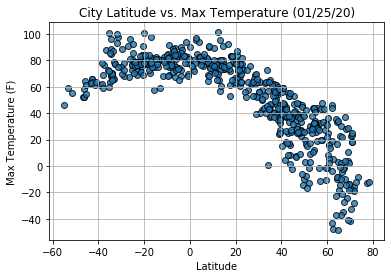

In [7]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (%s)" %time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")
          
#Show plot
plt.show()

#### Latitude vs. Humidity Plot

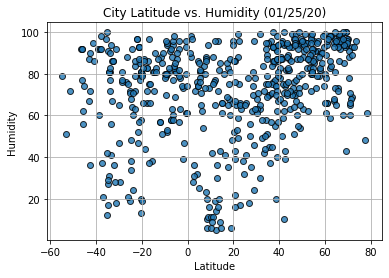

In [8]:
# Build scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity (%s)" %time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")
          
#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

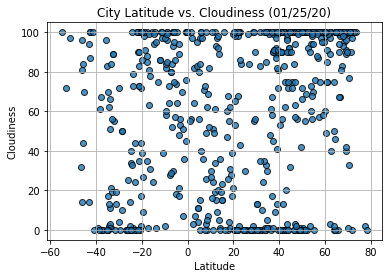

In [9]:
# Build scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness (%s)" %time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")
          
#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

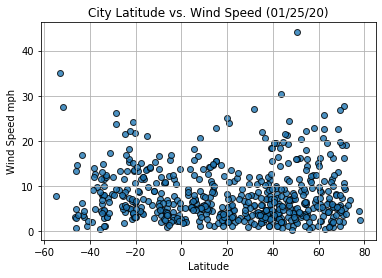

In [10]:
# Build scatter plot for latitude vs Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed (%s)" %time.strftime("%x"))
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")
          
#Show plot
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is : {rvalue}")
    plt.show()
                           

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

The r-squared is : -0.8657659236418448


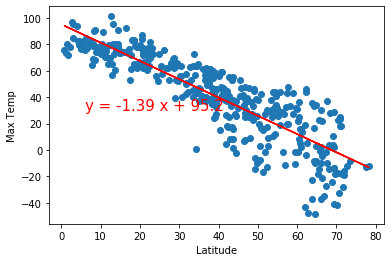

In [13]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.45722473082769755


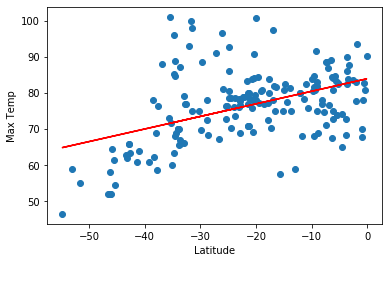

In [14]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,30))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.4605748145917696


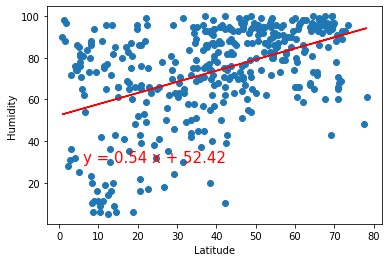

In [15]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.1406700113074028


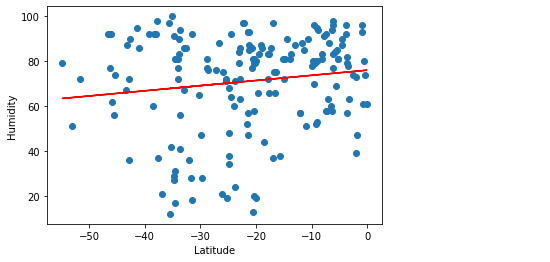

In [16]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.2998077912557235


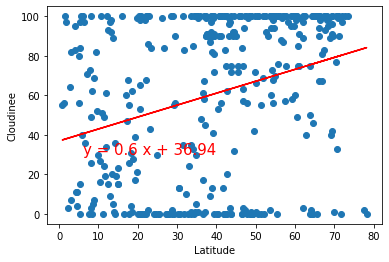

In [17]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudinee', (6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.2593756412450534


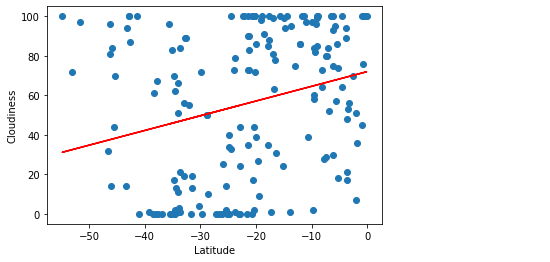

In [18]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09184744492044578


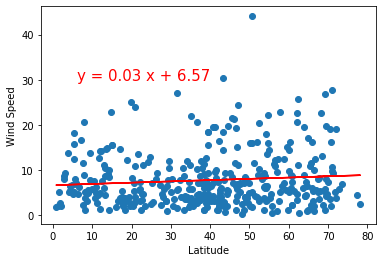

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.14102256757358622


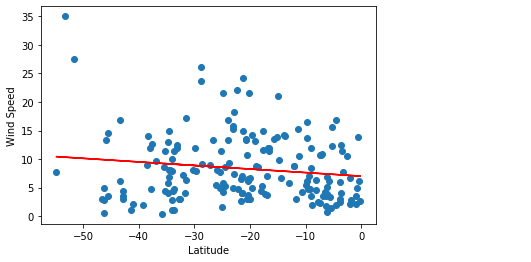

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,30))